## GenPop Stress main figures & tables

This is a master script for the main figures in Python.

In [1]:
# Necessary Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Figure 2D

In [2]:
fits = pd.read_csv("../../data/ds12w_fits_imp.csv")
# wide to long
fits_d = fits.drop(columns=['K_L_sd.x', 'K_L_sd.y', 'K_L_sd', 'K_S_sd.x','K_S_sd.y'])
fits_d.rename(columns={'K_S.x': 'K_S-1', 'K_S.y': 'K_S-2','K_L.x': 'K_L-1', 'K_L.y': 'K_L-2', 'K_L': 'K_L-3'}, inplace=True)
fits_l = pd.wide_to_long(fits_d, ['K_S','K_L'], i = 'subjid', j = 'session', sep = '-')

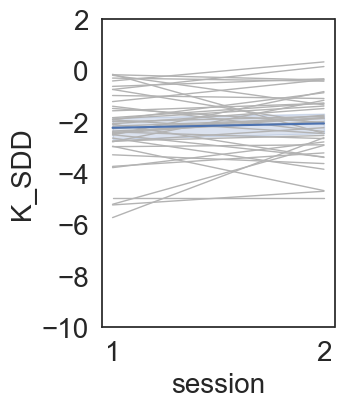

In [5]:
# left panel, SDD
fits_l["K_SDD"] = np.log(np.exp(fits_l["K_S"])/86400)
sns.set_theme(style="white")
font = {'size'   : 40}

plt.rc('font', **font)
fig, ax = plt.subplots()
fig.set_size_inches(3,4)
kss = sns.lineplot(
    data=fits_l, x="session", y="K_SDD", units='subjid', 
    color=".7", linewidth=1, estimator=None,
    )
kss.set_ylim(-10, 2)
kss.set_xticks([1, 2])
sns.lineplot(
    data=fits_l,
    x="session", y="K_SDD",
)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
#fig.savefig('../../figs/SDD.pdf', bbox_inches="tight")

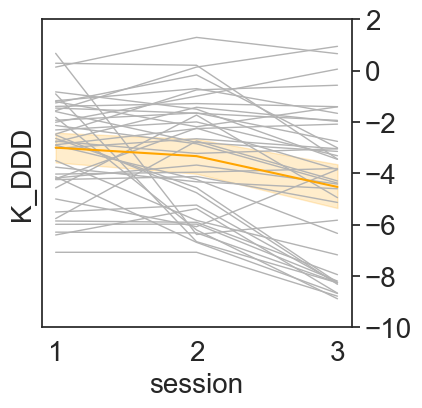

In [6]:
# right panel, SDD
fits_l["K_DDD"] = fits_l["K_L"]
sns.set_theme(style="white")
plt.rc('font', **font)
fig2, ax = plt.subplots()
fig2.set_size_inches(4,4)
kds = sns.lineplot(
    data=fits_l, x="session", y="K_DDD", units='subjid', 
    color=".7", linewidth=1, estimator=None,
    )
kds.set_ylim(-10, 2)
kds.set_xticks([1, 2, 3])
kd = sns.lineplot(
    data=fits_l,
    x="session", y="K_DDD", color='orange'
)
kd.yaxis.tick_right()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
#fig2.savefig('../../figs/DDD.pdf', bbox_inches="tight")

### Figure 3C

In [8]:
stress = pd.read_csv("../../data/dfjstr.csv")
# wide to long
saliva = stress[['subjid','ls1','ls2','ls3']]
saliva_l = pd.wide_to_long(saliva, 'ls', i = 'subjid', j = 'session')
hair = stress[['subjid','lh1','lh2','lh3']]
hair_l = pd.wide_to_long(hair, 'lh', i = 'subjid', j = 'session')
saliva_l.rename(columns={'ls': 'l', }, inplace=True)
saliva_l['sample'] = 'saliva'
hair_l.rename(columns={'lh': 'l', }, inplace=True)
hair_l['sample'] = 'hair'
stress_l = pd.concat([saliva_l, hair_l])
stress_lm = stress_l.reset_index()

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
figstr, ax = plt.subplots()
figstr.set_size_inches(5,3)
# Draw a nested boxplot to show cortisol session/sample type
strs = sns.boxplot(hue="session", y="l",
            x="sample", palette=["m", "g", "orange"],
            data=stress_lm)
# for legend text
plt.setp(strs.get_legend().get_texts(), fontsize='15') 
# for legend title
plt.setp(strs.get_legend().get_title(), fontsize='18') 
strs.set(ylabel = "log(cortisol)")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
#figstr.savefig('../../figs/cort.pdf', bbox_inches="tight")